Understanding and Forecasting Student Performance in
India

Objective  

Analyze student performance data to uncover patterns in academic success across subjects
and demographics. Use statistical analysis and machine learning to predict performance and
identify interventions for improvement — useful for educators and policymakers alike. 

Dataset  
* Source: [Kaggle - Student Performance Dataset (Math, Reading, Writing Scores)]  
* Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams  

Columns include:  
* gender, race/ethnicity, parental level of education,
* lunch, test preparation course
* math score, reading score, writing score

Use Cases  
* Predict students at risk of underperforming
* Understand how socio-economic and educational backgrounds impact scores
* Recommend interventions (e.g., test prep, tutoring)
* Visualize gaps across gender or ethnicity groups

SECTION A: Python & Data Cleaning  
* Load the dataset and inspect the first few rows, datatypes, and null values.
* Check for duplicate rows or invalid data entries.
* Standardize categorical values (e.g., group education levels, rename ethnicities).
* Add derived columns:  
      * Average Score = (Math + Reading + Writing)/3  
      * Performance Category: Low, Medium, High based on average score  
      * Preparation Effectiveness: Compare scores with and without test prep

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df2 = df.copy()

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [8]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
duplicate_value = df.duplicated().sum()
duplicate_value

np.int64(0)

In [12]:
if duplicate_value > 0:
  print(df[df.duplicated()].head())


In [13]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [14]:
def map_parent_edu(x):
  x = x.lower()
  if 'high school' in x or 'some high school' in x:
    return 'High School or lower'
  elif 'some college' in x or 'associate' in x:
    return 'Some College / Associate'
  elif 'bachelor' in x:
    return 'Bachelor'
  elif 'master' in x:
    return 'Master'
  else:
    return 'Other'

In [15]:
df['parent_edu_grouped'] = df['parental level of education'].map(map_parent_edu)

In [16]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_grouped
0,female,group B,bachelor's degree,standard,none,72,72,74,Bachelor
1,female,group C,some college,standard,completed,69,90,88,Some College / Associate
2,female,group B,master's degree,standard,none,90,95,93,Master
3,male,group A,associate's degree,free/reduced,none,47,57,44,Some College / Associate
4,male,group C,some college,standard,none,76,78,75,Some College / Associate
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Master
996,male,group C,high school,free/reduced,none,62,55,55,High School or lower
997,female,group C,high school,free/reduced,completed,59,71,65,High School or lower
998,female,group D,some college,standard,completed,68,78,77,Some College / Associate


In [17]:
df['race/ethnicity'] = df['race/ethnicity'].str.strip().str.title()

In [18]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_grouped
0,female,Group B,bachelor's degree,standard,none,72,72,74,Bachelor
1,female,Group C,some college,standard,completed,69,90,88,Some College / Associate
2,female,Group B,master's degree,standard,none,90,95,93,Master
3,male,Group A,associate's degree,free/reduced,none,47,57,44,Some College / Associate
4,male,Group C,some college,standard,none,76,78,75,Some College / Associate
...,...,...,...,...,...,...,...,...,...
995,female,Group E,master's degree,standard,completed,88,99,95,Master
996,male,Group C,high school,free/reduced,none,62,55,55,High School or lower
997,female,Group C,high school,free/reduced,completed,59,71,65,High School or lower
998,female,Group D,some college,standard,completed,68,78,77,Some College / Associate


In [19]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_grouped,average_score
0,female,Group B,bachelor's degree,standard,none,72,72,74,Bachelor,72.666667
1,female,Group C,some college,standard,completed,69,90,88,Some College / Associate,82.333333
2,female,Group B,master's degree,standard,none,90,95,93,Master,92.666667
3,male,Group A,associate's degree,free/reduced,none,47,57,44,Some College / Associate,49.333333
4,male,Group C,some college,standard,none,76,78,75,Some College / Associate,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,Group E,master's degree,standard,completed,88,99,95,Master,94.000000
996,male,Group C,high school,free/reduced,none,62,55,55,High School or lower,57.333333
997,female,Group C,high school,free/reduced,completed,59,71,65,High School or lower,65.000000
998,female,Group D,some college,standard,completed,68,78,77,Some College / Associate,74.333333


In [20]:
def performance_cat(avg):
  if avg < 60:
    return 'Low'
  elif avg < 80:
    return 'Medium'
  else:
    return 'High'

In [21]:
df['performance_category'] = df['average_score'].apply(performance_cat)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_grouped,average_score,performance_category
0,female,Group B,bachelor's degree,standard,none,72,72,74,Bachelor,72.666667,Medium
1,female,Group C,some college,standard,completed,69,90,88,Some College / Associate,82.333333,High
2,female,Group B,master's degree,standard,none,90,95,93,Master,92.666667,High
3,male,Group A,associate's degree,free/reduced,none,47,57,44,Some College / Associate,49.333333,Low
4,male,Group C,some college,standard,none,76,78,75,Some College / Associate,76.333333,Medium
...,...,...,...,...,...,...,...,...,...,...,...
995,female,Group E,master's degree,standard,completed,88,99,95,Master,94.000000,High
996,male,Group C,high school,free/reduced,none,62,55,55,High School or lower,57.333333,Low
997,female,Group C,high school,free/reduced,completed,59,71,65,High School or lower,65.000000,Medium
998,female,Group D,some college,standard,completed,68,78,77,Some College / Associate,74.333333,Medium


In [22]:
prep_group = df.groupby('test preparation course')['average_score'].mean().to_dict()

In [23]:
def prep_effectiveness(row):
  group = row['test preparation course']
  mean_for_group = prep_group.get(group, np.nan)
  return row['average_score'] - mean_for_group

In [24]:
df['prep_effectiveness'] = df.apply(prep_effectiveness, axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_grouped,average_score,performance_category,prep_effectiveness
0,female,Group B,bachelor's degree,standard,none,72,72,74,Bachelor,72.666667,Medium,7.627726
1,female,Group C,some college,standard,completed,69,90,88,Some College / Associate,82.333333,High,9.663873
2,female,Group B,master's degree,standard,none,90,95,93,Master,92.666667,High,27.627726
3,male,Group A,associate's degree,free/reduced,none,47,57,44,Some College / Associate,49.333333,Low,-15.705607
4,male,Group C,some college,standard,none,76,78,75,Some College / Associate,76.333333,Medium,11.294393
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,Group E,master's degree,standard,completed,88,99,95,Master,94.000000,High,21.330540
996,male,Group C,high school,free/reduced,none,62,55,55,High School or lower,57.333333,Low,-7.705607
997,female,Group C,high school,free/reduced,completed,59,71,65,High School or lower,65.000000,Medium,-7.669460
998,female,Group D,some college,standard,completed,68,78,77,Some College / Associate,74.333333,Medium,1.663873


SECTION B: SQL Operations  
* Import the cleaned dataset into a SQL database.
* Write SQL queries to:  
      1. List top 5 students with highest average scores.  
      2. Find the average math, reading, and writing scores by gender.  
      3. Compare average scores of students who completed test prep vs. those who
         didn’t.  
      4. Count how many students fall into each performance category.  
      5. Identify which ethnic group has the highest average total score.

1. SELECT       
  gender,  
  "race/ethnicity",  
  "test preparation course",  
  ("math score" + "reading score" + "writing score") / 3.0 AS average_score  
FROM StudentsPerformance  
ORDER BY average_score DESC  
LIMIT 5;

2. SELECT  
  gender,  
  AVG("math score")    AS avg_math_score,  
  AVG("reading score") AS avg_reading_score,  
  AVG("writing score") AS avg_writing_score  
FROM StudentsPerformance  
GROUP BY gender;  

3. SELECT  
  "test preparation course",  
  AVG(("math score" + "reading score" + "writing score") / 3.0) AS avg_overall_score,  
  AVG("math score")    AS avg_math_score,  
  AVG("reading score") AS avg_reading_score,  
  AVG("writing score") AS avg_writing_score  
FROM StudentsPerformance  
GROUP BY "test preparation course";

4. SELECT  
  CASE  
    WHEN ("math score" + "reading score" + "writing score")/3.0 < 60 THEN 'Low'  
    WHEN ("math score" + "reading score" + "writing score")/3.0 < 80 THEN 'Medium'  
    ELSE 'High'  
  END AS performance_category,  
  COUNT(*) AS count_students  
FROM StudentsPerformance  
GROUP BY  
  CASE  
    WHEN ("math score" + "reading score" + "writing score")/3.0 < 60 THEN 'Low'  
    WHEN ("math score" + "reading score" + "writing score")/3.0 < 80 THEN 'Medium'  
    ELSE 'High'  
  END;



5. SELECT  
  "race/ethnicity",  
  AVG("math score" + "reading score" + "writing score") AS avg_total_score  
FROM StudentsPerformance  
GROUP BY "race/ethnicity"  
ORDER BY avg_total_score DESC  
LIMIT 1;

In [25]:
df['prep_effectiveness'] = df.apply(prep_effectiveness, axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_grouped,average_score,performance_category,prep_effectiveness
0,female,Group B,bachelor's degree,standard,none,72,72,74,Bachelor,72.666667,Medium,7.627726
1,female,Group C,some college,standard,completed,69,90,88,Some College / Associate,82.333333,High,9.663873
2,female,Group B,master's degree,standard,none,90,95,93,Master,92.666667,High,27.627726
3,male,Group A,associate's degree,free/reduced,none,47,57,44,Some College / Associate,49.333333,Low,-15.705607
4,male,Group C,some college,standard,none,76,78,75,Some College / Associate,76.333333,Medium,11.294393
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,Group E,master's degree,standard,completed,88,99,95,Master,94.000000,High,21.330540
996,male,Group C,high school,free/reduced,none,62,55,55,High School or lower,57.333333,Low,-7.705607
997,female,Group C,high school,free/reduced,completed,59,71,65,High School or lower,65.000000,Medium,-7.669460
998,female,Group D,some college,standard,completed,68,78,77,Some College / Associate,74.333333,Medium,1.663873


SECTION C: Exploratory Data Analysis & Descriptive  


Statistics  

Exploratory Data Analysis:  
* Histograms for all three subject scores.
* Box plots comparing scores by gender and parental education level.
* Grouped bar plots of average scores across test preparation and lunch type.
* Heatmap of correlation among numerical features.
* Scatter plot of math vs. reading scores with performance category color-coding.
* Stacked bar chart showing performance category by ethnic group.
* Count plot of number of students in each performance tier by gender.  


Descriptive Statistics:


* Calculate mean, median, variance, and standard deviation for all three scores.
* Create summary tables showing average scores per category (e.g., lunch type, test
prep).
* Calculate coefficient of variation for math, reading, and writing scores.
* Rank top 3 factors associated with high performance (based on group averages).
* Determine which feature (e.g., lunch type, gender) has the largest score variance.

In [26]:
newDf = df.copy()

In [27]:
newDf.to_csv("StudentPerformance1.csv")

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

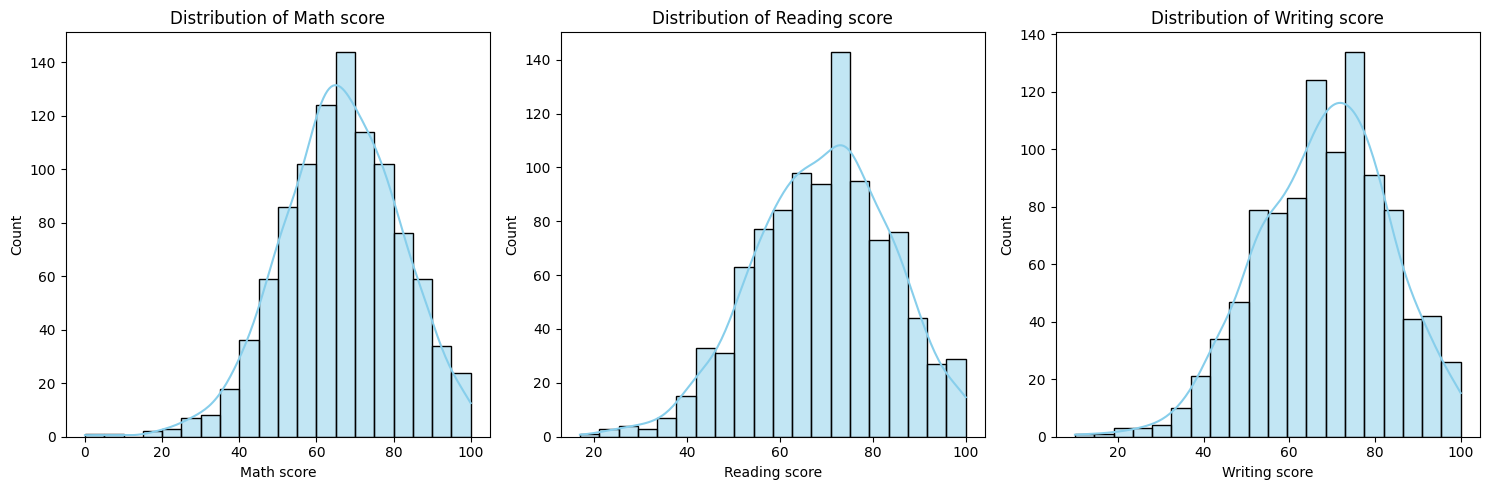

In [30]:
plt.figure(figsize=(15,5))
for i, subject in enumerate(['math score','reading score','writing score']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[subject], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {subject.capitalize()}')
    plt.xlabel(subject.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


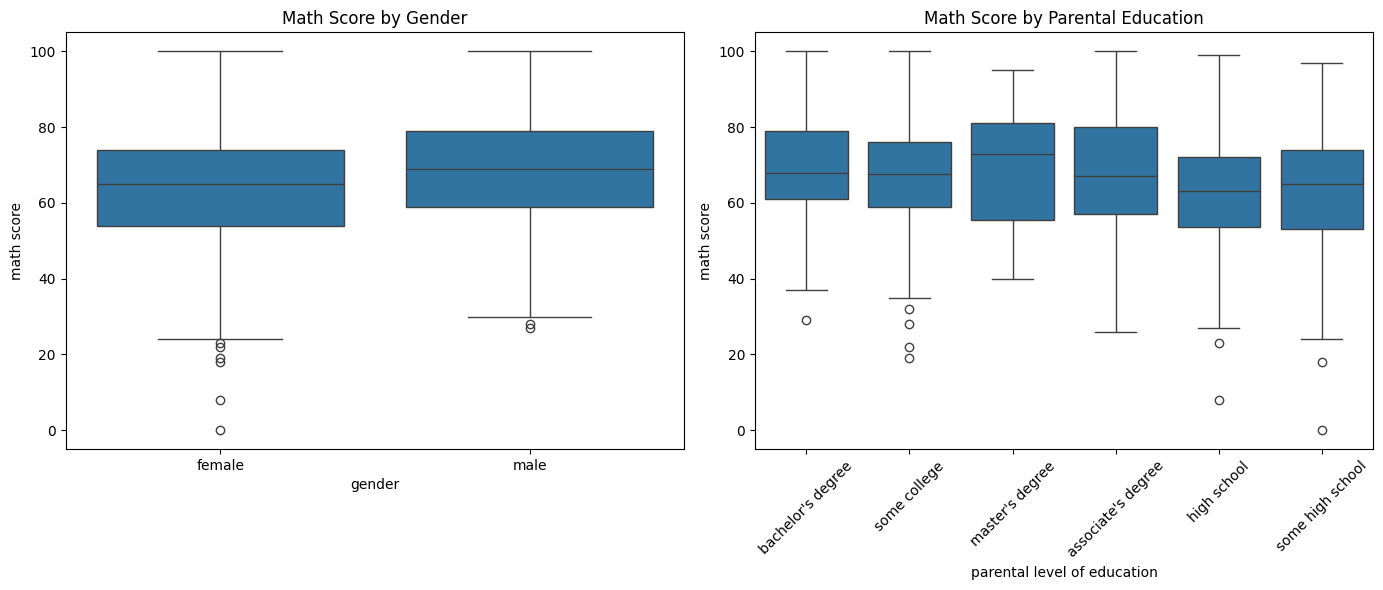

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')

plt.subplot(1,2,2)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Math Score by Parental Education')
plt.tight_layout()
plt.show()


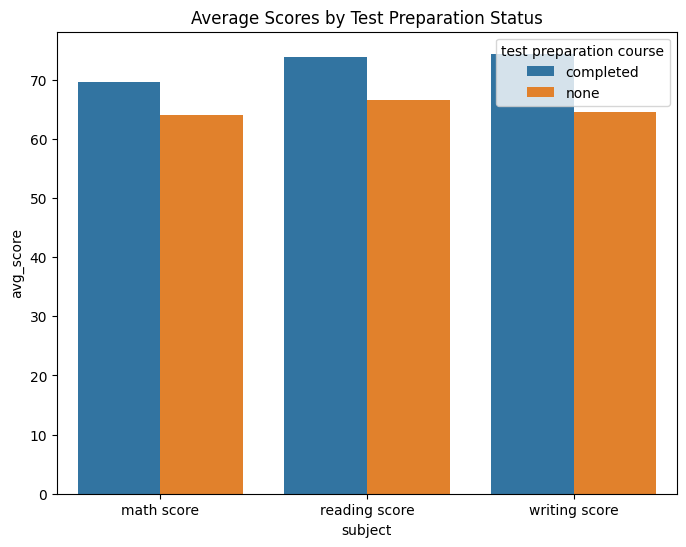

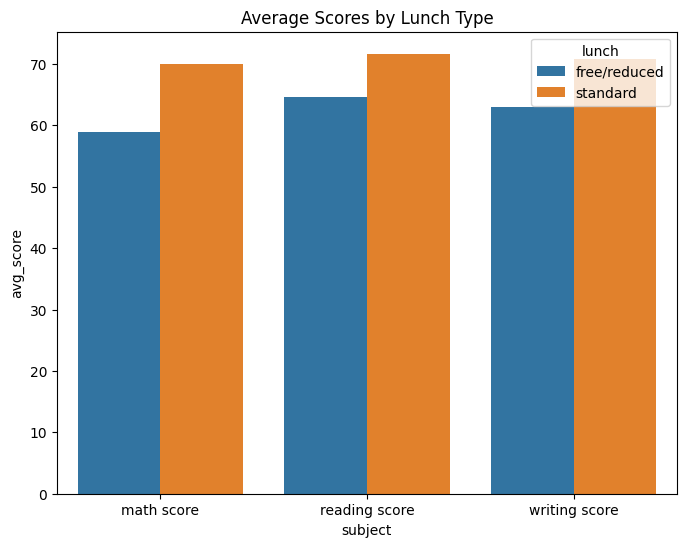

In [33]:

prep_avgs = df.groupby('test preparation course')[['math score','reading score','writing score']].mean().reset_index()

prep_avgs_melted = prep_avgs.melt(id_vars='test preparation course', var_name='subject', value_name='avg_score')

plt.figure(figsize=(8,6))
sns.barplot(x='subject', y='avg_score', hue='test preparation course', data=prep_avgs_melted)
plt.title('Average Scores by Test Preparation Status')
plt.show()


lunch_avgs = df.groupby('lunch')[['math score','reading score','writing score']].mean().reset_index()
lunch_melted = lunch_avgs.melt(id_vars='lunch', var_name='subject', value_name='avg_score')

plt.figure(figsize=(8,6))
sns.barplot(x='subject', y='avg_score', hue='lunch', data=lunch_melted)
plt.title('Average Scores by Lunch Type')
plt.show()


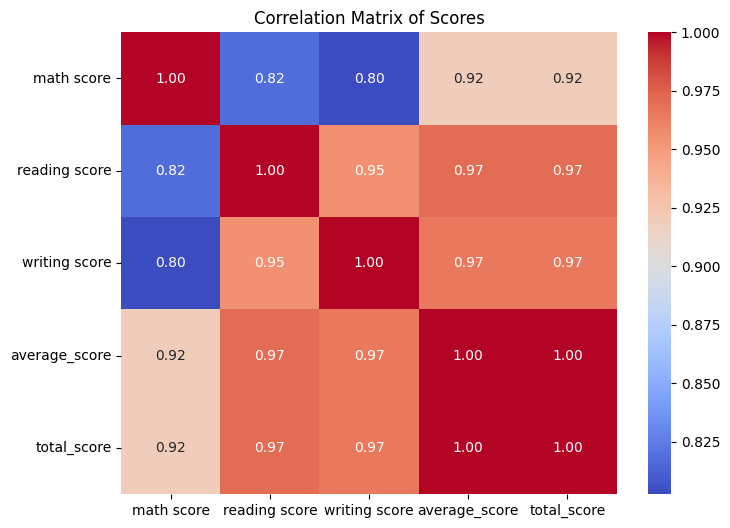

In [36]:
num_cols = ['math score','reading score','writing score','average_score','total_score']
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scores')
plt.show()


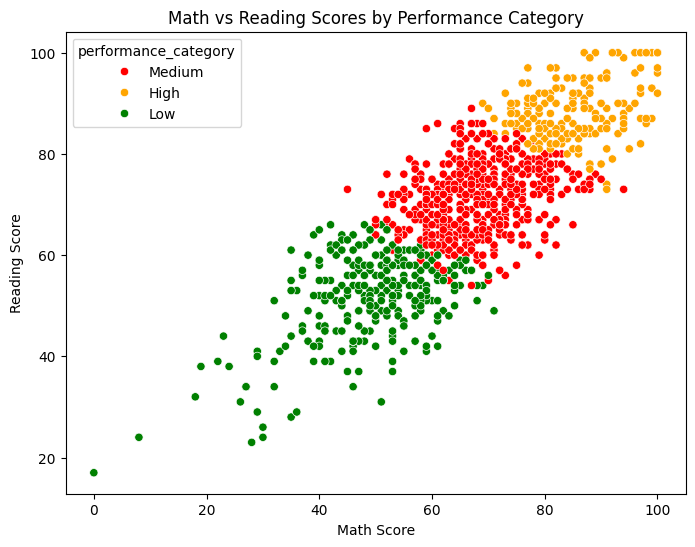

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='math score', y='reading score', hue='performance_category', data=df, palette=['red','orange','green'])
plt.title('Math vs Reading Scores by Performance Category')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()


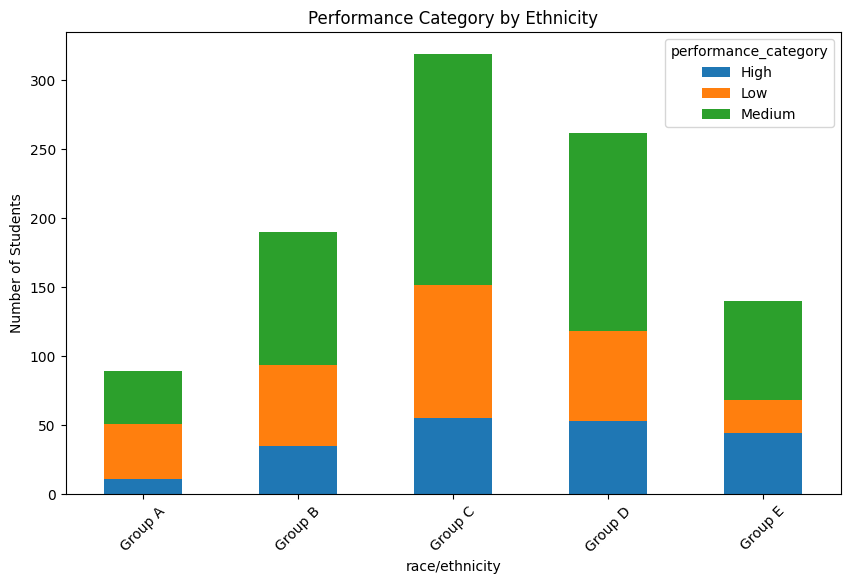

In [39]:
grouped = df.groupby(['race/ethnicity', 'performance_category']).size().reset_index(name='count')

pivot = grouped.pivot(index='race/ethnicity', columns='performance_category', values='count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Number of Students')
plt.title('Performance Category by Ethnicity')
plt.xticks(rotation=45)
plt.show()


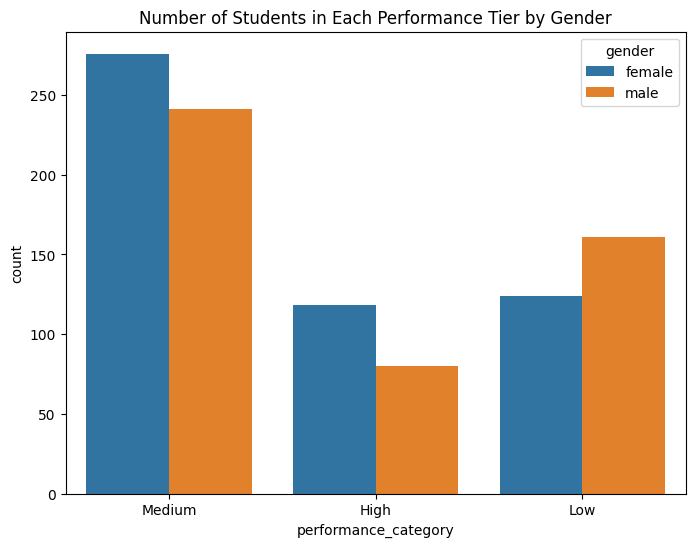

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='performance_category', hue='gender', data=df)
plt.title('Number of Students in Each Performance Tier by Gender')
plt.show()


In [41]:
# Means, medians, variances, standard deviations
descriptives = {}
for subject in ['math score','reading score','writing score']:
    descriptives[subject] = {
        'mean': df[subject].mean(),
        'median': df[subject].median(),
        'variance': df[subject].var(),
        'std_dev': df[subject].std()
    }

descriptives_df = pd.DataFrame(descriptives).T
print("Descriptive Statistics:")
print(descriptives_df)


Descriptive Statistics:
                 mean  median    variance    std_dev
math score     66.089    66.0  229.918998  15.163080
reading score  69.169    70.0  213.165605  14.600192
writing score  68.054    69.0  230.907992  15.195657


In [42]:
# By test preparation
summary_prep = df.groupby('test preparation course')[['math score','reading score','writing score']].mean()
print("Average scores by test prep:")
print(summary_prep)

# By gender
summary_gender = df.groupby('gender')[['math score','reading score','writing score']].mean()
print("Average scores by gender:")
print(summary_gender)

# By parental education
summary_parentedu = df.groupby('parental level of education')[['math score','reading score','writing score']].mean().sort_index()
print("Average scores by parental education:")
print(summary_parentedu)


Average scores by test prep:
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673
Average scores by gender:
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203
Average scores by parental education:
                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college               

In [43]:
coeff_var = {}
for subject in ['math score','reading score','writing score']:
    mean = df[subject].mean()
    std = df[subject].std()
    coeff_var[subject] = std / mean if mean != 0 else np.nan

print("Coefficient of Variation:")
print(coeff_var)


Coefficient of Variation:
{'math score': np.float64(0.22943424920954245), 'reading score': np.float64(0.21107999157501506), 'writing score': np.float64(0.22328822715592986)}


In [44]:
# For each factor, compute group averages, then measure difference between the best & rest

factors = ['gender', 'test preparation course', 'lunch', 'parental level of education', 'race/ethnicity']
factor_scores = {}

for factor in factors:
    grp = df.groupby(factor)['average_score'].mean().sort_values(ascending=False)
    # store the top group and its average
    factor_scores[factor] = (grp.index[0], grp.iloc[0])

# Now sort factors by their best group average
sorted_factors = sorted(factor_scores.items(), key=lambda x: x[1][1], reverse=True)

print("Factors ranked by highest average performance:")
for factor, (group, avg) in sorted_factors[:3]:
    print(factor, "→", group, "with avg:", avg)


Factors ranked by highest average performance:
parental level of education → master's degree with avg: 73.59887005649718
race/ethnicity → Group E with avg: 72.75238095238096
test preparation course → completed with avg: 72.66945996275605


In [48]:
variances = {}
for factor in ['gender', 'test preparation course', 'lunch', 'parental level of education', 'race/ethnicity']:
    grp = df.groupby(factor)['average_score'].var()
    variances[factor] = grp.max()  # or maybe variance among group means?

print("Variance in average_score by factor:")
print(variances, end = " ")


Variance in average_score by factor:
{'gender': np.float64(211.46421290038302), 'test preparation course': np.float64(201.26265181448383), 'lunch': np.float64(209.04312529287463), 'parental level of education': np.float64(224.52260093877044), 'race/ethnicity': np.float64(217.0357405860329)} 

SECTION E: Machine Learning  
 
Regression Task  

* Predict total or average score based on demographic features.
* Models to try: Linear Regression, Random Forest Regressor
* Evaluate using MAE, MSE, R²

Classification Task  

* Classify students into performance buckets (Low, Medium, High).
* Label encode categorical variables.
* Train and compare:
    1. Logistic Regression  
    2. Decision Tree  
    3. Random Forest  
* Display feature importance from tree-based models

In [49]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
X_demo = df[['gender','parental level of education','race/ethnicity','test preparation course','lunch']]  


X_enc = pd.get_dummies(X_demo, drop_first=True)  # one‐hot encoding


In [52]:
# Regression target
Y_reg = df['average_score'] 

X_train, X_test, y_train, y_test = train_test_split(X_enc, Y_reg, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)





In [53]:
# Model 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [54]:

# Evaluate
def regression_metrics(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R2: {r2:.3f}")
    print()


In [55]:

regression_metrics(y_test, y_pred_lr, "Linear Regression")
regression_metrics(y_test, y_pred_rf, "Random Forest Regressor")

--- Linear Regression ---
MAE: 10.490
MSE: 179.602
R2: 0.162

--- Random Forest Regressor ---
MAE: 11.485
MSE: 218.412
R2: -0.019



In [56]:
# Classification target
Y_clf = df['performance_category']

le = LabelEncoder()
Y_enc = le.fit_transform(Y_clf)  


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_enc, Y_enc, test_size=0.2, random_state=42)


In [57]:

# Model A: Logistic Regression
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logreg.fit(X_train_c, y_train_c)
y_pred_log = logreg.predict(X_test_c)


/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [58]:

# Model B: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_c, y_train_c)
y_pred_dt = dt.predict(X_test_c)


In [59]:

# Model C: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf_clf = rf_clf.predict(X_test_c)


In [60]:
def classification_metrics(y_true, y_pred, model_name="Model"):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    print()


In [61]:

classification_metrics(y_test_c, y_pred_log, "Logistic Regression")
classification_metrics(y_test_c, y_pred_dt, "Decision Tree")
classification_metrics(y_test_c, y_pred_rf_clf, "Random Forest Classifier")


--- Logistic Regression ---
Accuracy: 0.545
Confusion Matrix:
[[ 2  3 26]
 [ 1 24 37]
 [ 4 20 83]]
Classification Report:
              precision    recall  f1-score   support

        High       0.29      0.06      0.11        31
         Low       0.51      0.39      0.44        62
      Medium       0.57      0.78      0.66       107

    accuracy                           0.55       200
   macro avg       0.45      0.41      0.40       200
weighted avg       0.51      0.55      0.50       200


--- Decision Tree ---
Accuracy: 0.38
Confusion Matrix:
[[12  8 11]
 [ 9 22 31]
 [30 35 42]]
Classification Report:
              precision    recall  f1-score   support

        High       0.24      0.39      0.29        31
         Low       0.34      0.35      0.35        62
      Medium       0.50      0.39      0.44       107

    accuracy                           0.38       200
   macro avg       0.36      0.38      0.36       200
weighted avg       0.41      0.38      0.39       200



In [62]:
# For Decision Tree
importances_dt = dt.feature_importances_
features = X_enc.columns
dt_imp_df = pd.DataFrame({'feature': features, 'importance': importances_dt}).sort_values(by='importance', ascending=False)
print("Decision Tree Feature Importances:")
print(dt_imp_df.head(10))



Decision Tree Feature Importances:
                                          feature  importance
0                                     gender_male    0.114186
10                   test preparation course_none    0.109709
11                                 lunch_standard    0.108720
4        parental level of education_some college    0.104644
1   parental level of education_bachelor's degree    0.098038
7                          race/ethnicity_Group C    0.097644
5    parental level of education_some high school    0.075761
6                          race/ethnicity_Group B    0.072353
2         parental level of education_high school    0.065787
9                          race/ethnicity_Group E    0.065346


In [63]:

# For Random Forest
importances_rf = rf_clf.feature_importances_
rf_imp_df = pd.DataFrame({'feature': features, 'importance': importances_rf}).sort_values(by='importance', ascending=False)
print("Random Forest Feature Importances:")
print(rf_imp_df.head(10))

Random Forest Feature Importances:
                                          feature  importance
11                                 lunch_standard    0.140114
0                                     gender_male    0.132247
10                   test preparation course_none    0.120714
4        parental level of education_some college    0.080108
5    parental level of education_some high school    0.074374
1   parental level of education_bachelor's degree    0.073837
7                          race/ethnicity_Group C    0.071937
8                          race/ethnicity_Group D    0.070880
6                          race/ethnicity_Group B    0.067692
2         parental level of education_high school    0.064846
